In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:


from fastai.vision import *
from fastai.metrics import error_rate



In [0]:
!unzip "/content/drive/My Drive/upload.zip"

Archive:  /content/drive/My Drive/upload.zip
   creating: upload/Parasitized/
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
  inflating: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_138.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_140.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_141.png  
 extracting: upload/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_142.png  
 extracting: upload/Parasitized/C100P61Thi

In [0]:
bs=64
np.random.seed(2)

In [0]:
mkdir train


In [0]:
shutil.move("/content/upload/Parasitized","/content/train")

'/content/train/Parasitized'

In [0]:
shutil ??


SyntaxError: ignored

In [0]:
help(shutil)

Help on module shutil:

NAME
    shutil - Utility functions for copying and archiving files and directory trees.

MODULE REFERENCE
    https://docs.python.org/3.6/library/shutil
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    XXX The functions here don't copy the resource fork or other metadata on Mac.

CLASSES
    builtins.OSError(builtins.Exception)
        Error
            SameFileError
        ExecError
        SpecialFileError
    
    class Error(builtins.OSError)
     |  Base class for I/O related errors.
     |  
     |  Method resolution order:
     |      Error
     |      builtins.OSError
     |      builtins.Exception
     |      builtins.BaseException
     |      builtins.object
    

[]

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder("/content/train",train=".",valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs,num_workers=4
                                  ).normalize(imagenet_stats)

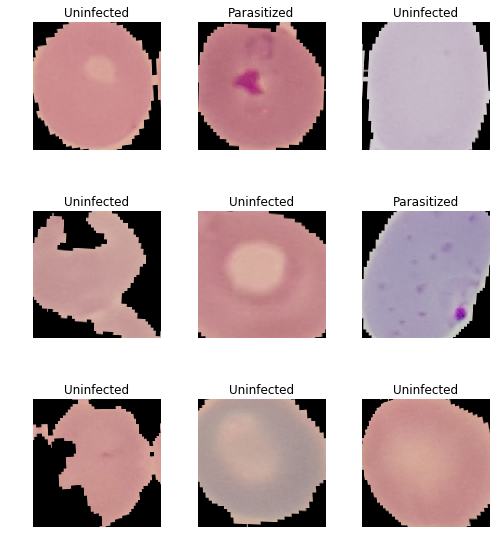

In [0]:
data.show_batch(rows=3,figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 22425651.49it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.250168,0.170893,0.062250,02:48
1,0.186481,0.133293,0.047250,02:48
2,0.160726,0.119885,0.040500,02:47
3,0.142527,0.117283,0.041750,02:47
